In [34]:
from pyod.utils.data import generate_data

In [35]:
X_train,Y_train=generate_data(n_train=300,n_features=2,train_only=True,contamination=0.13,random_state=42)

In [55]:
X_train.shape

(300, 2)

In [56]:
Y_train=Y_train.astype(int)


(300,)

## Contamination=Percentage of outliers
## PyOD is the most comprehensive and scalable Python library for detecting outlying objects in multivariate data

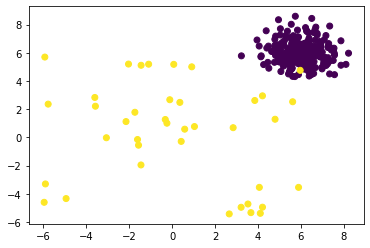

In [38]:
x1,x2=X_train[:,0],X_train[:,1]
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x1,x2,c=Y_train)

## Yellow is outlier  Purple is normal point

## FP(False Positive)-Outlier detected but not
## FN(False Negative)-Outlier not detected but outlier

In [39]:
from pyod.models.abod import ABOD

In [40]:
model=ABOD(method='fast',n_neighbors=10)

In [41]:
model.fit(X_train)

ABOD(contamination=0.1, method='fast', n_neighbors=10)

In [42]:
pred=model.predict(X_train)

In [43]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1])

In [44]:
from sklearn.metrics import accuracy_score


In [46]:
accuracy_score(pred,Y_train)

0.9566666666666667

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns

In [68]:
D=pd.DataFrame(X_train,columns=['input_1','input_2'])
D['actual']=Y_train
D['Predicted']=pred
# o means no outlier 1 means outlier

In [94]:
D['Predicted_new']=D['Predicted'].apply(lambda x:'Not Outlier' if x==0 else 'Outlier')

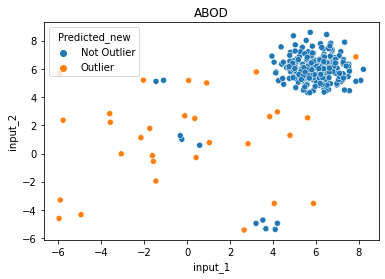

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.scatterplot(data=D,x='input_1',y='input_2',hue='Predicted_new')
plt.title('ABOD')
plt.show()


## There are some FN and FP cases


## Confusion Matrix

In [101]:
from sklearn.metrics import confusion_matrix 

confusion_matrix(pred,Y_train)
    

array([[259,  11],
       [  2,  28]])

## There are 11 FP cases
## There are 2 FN cases as seen from the graph